# Assignment16_NN(Turbine)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

# 1 - Business Problem

PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

# 2 - Data collection and description

In [2]:
df = pd.read_csv("gas_turbines.csv")
df1 = df.copy()
df1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
df1.drop_duplicates()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
df1.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


AT


C:\Users\Shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


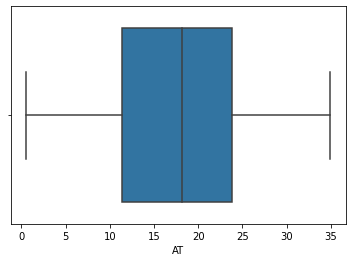

AP


C:\Users\Shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


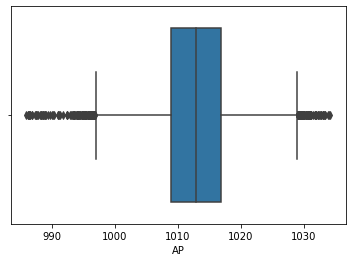

AH


C:\Users\Shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


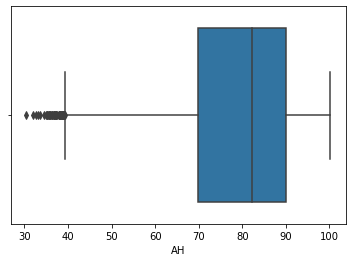

AFDP


C:\Users\Shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


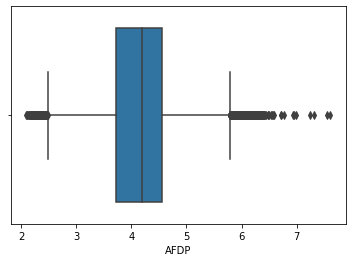

GTEP


C:\Users\Shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


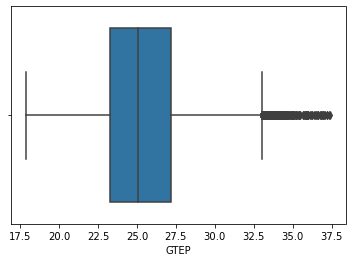

TIT


C:\Users\Shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


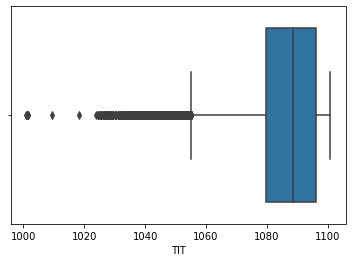

TAT


C:\Users\Shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


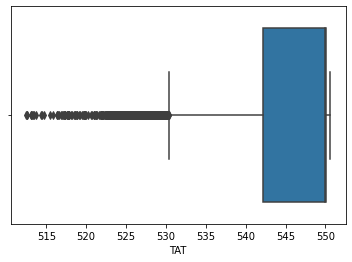

C:\Users\Shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TEY


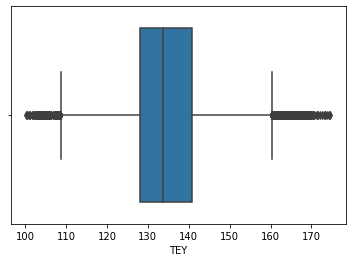

CDP


C:\Users\Shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


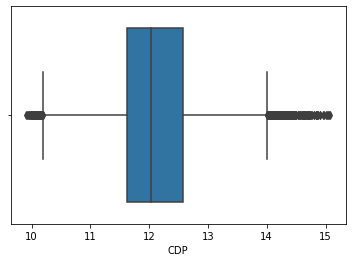

CO


C:\Users\Shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


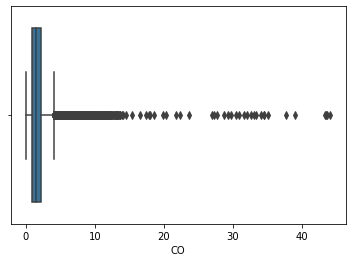

NOX


C:\Users\Shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


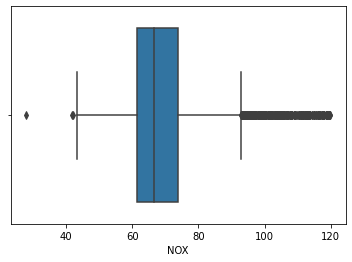

In [6]:
for i in df1.columns:
    print(i)
    sns.boxplot(df1[i])
    plt.show()

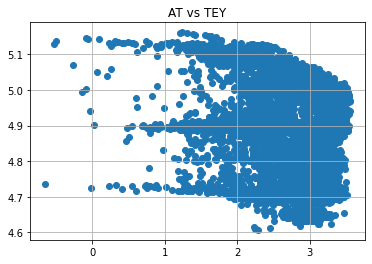

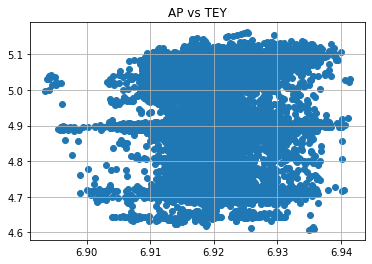

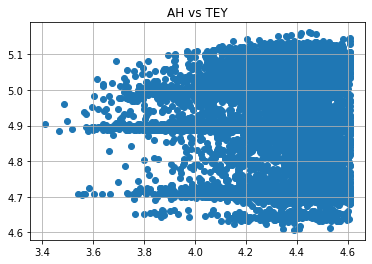

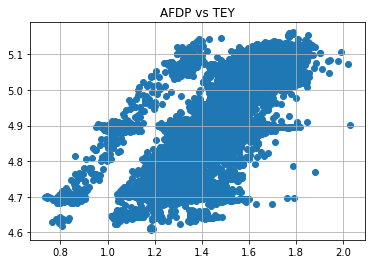

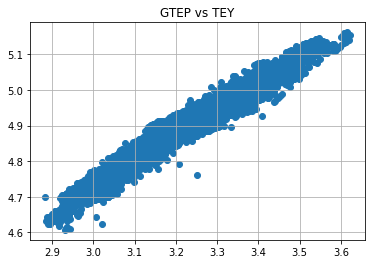

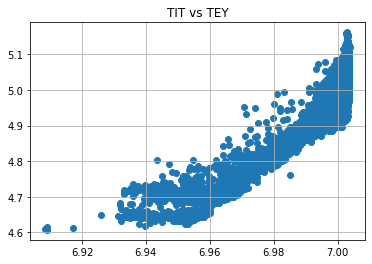

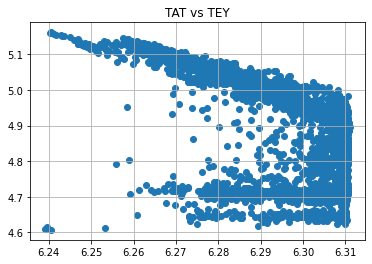

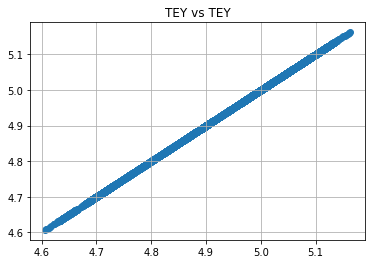

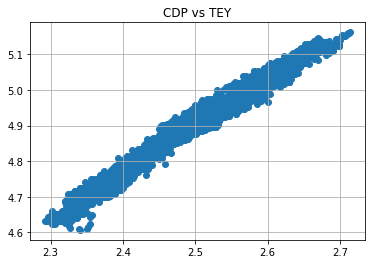

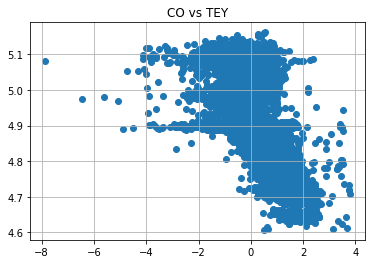

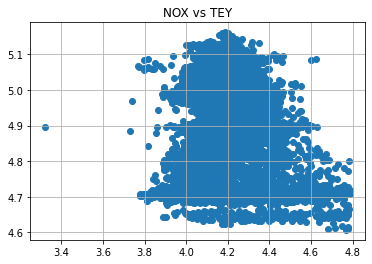

In [7]:
for i in df1.columns:
    plt.scatter(np.log(df1[i]), np.log(df1['TEY']))
    plt.title(i+ ' vs TEY')
    plt.grid()
    plt.show()

In [8]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.14596270190452942
Kurtosis: -0.4870582497451621


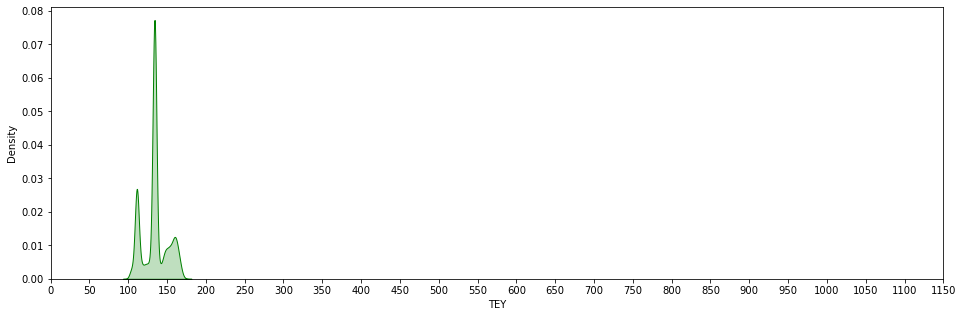

In [9]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['TEY'].skew()))
print("Kurtosis: {}".format(df1['TEY'].kurtosis()))
ax = sns.kdeplot(df1['TEY'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

The Data is highly skewed and has large kurtosis value
Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land

In [10]:
dfa = df1[df1.columns[0:10]]
month_colum = dfa.select_dtypes(include='object').columns.tolist()

In [11]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(4,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(4,2,i+2)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

<Figure size 1152x720 with 0 Axes>

In [12]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

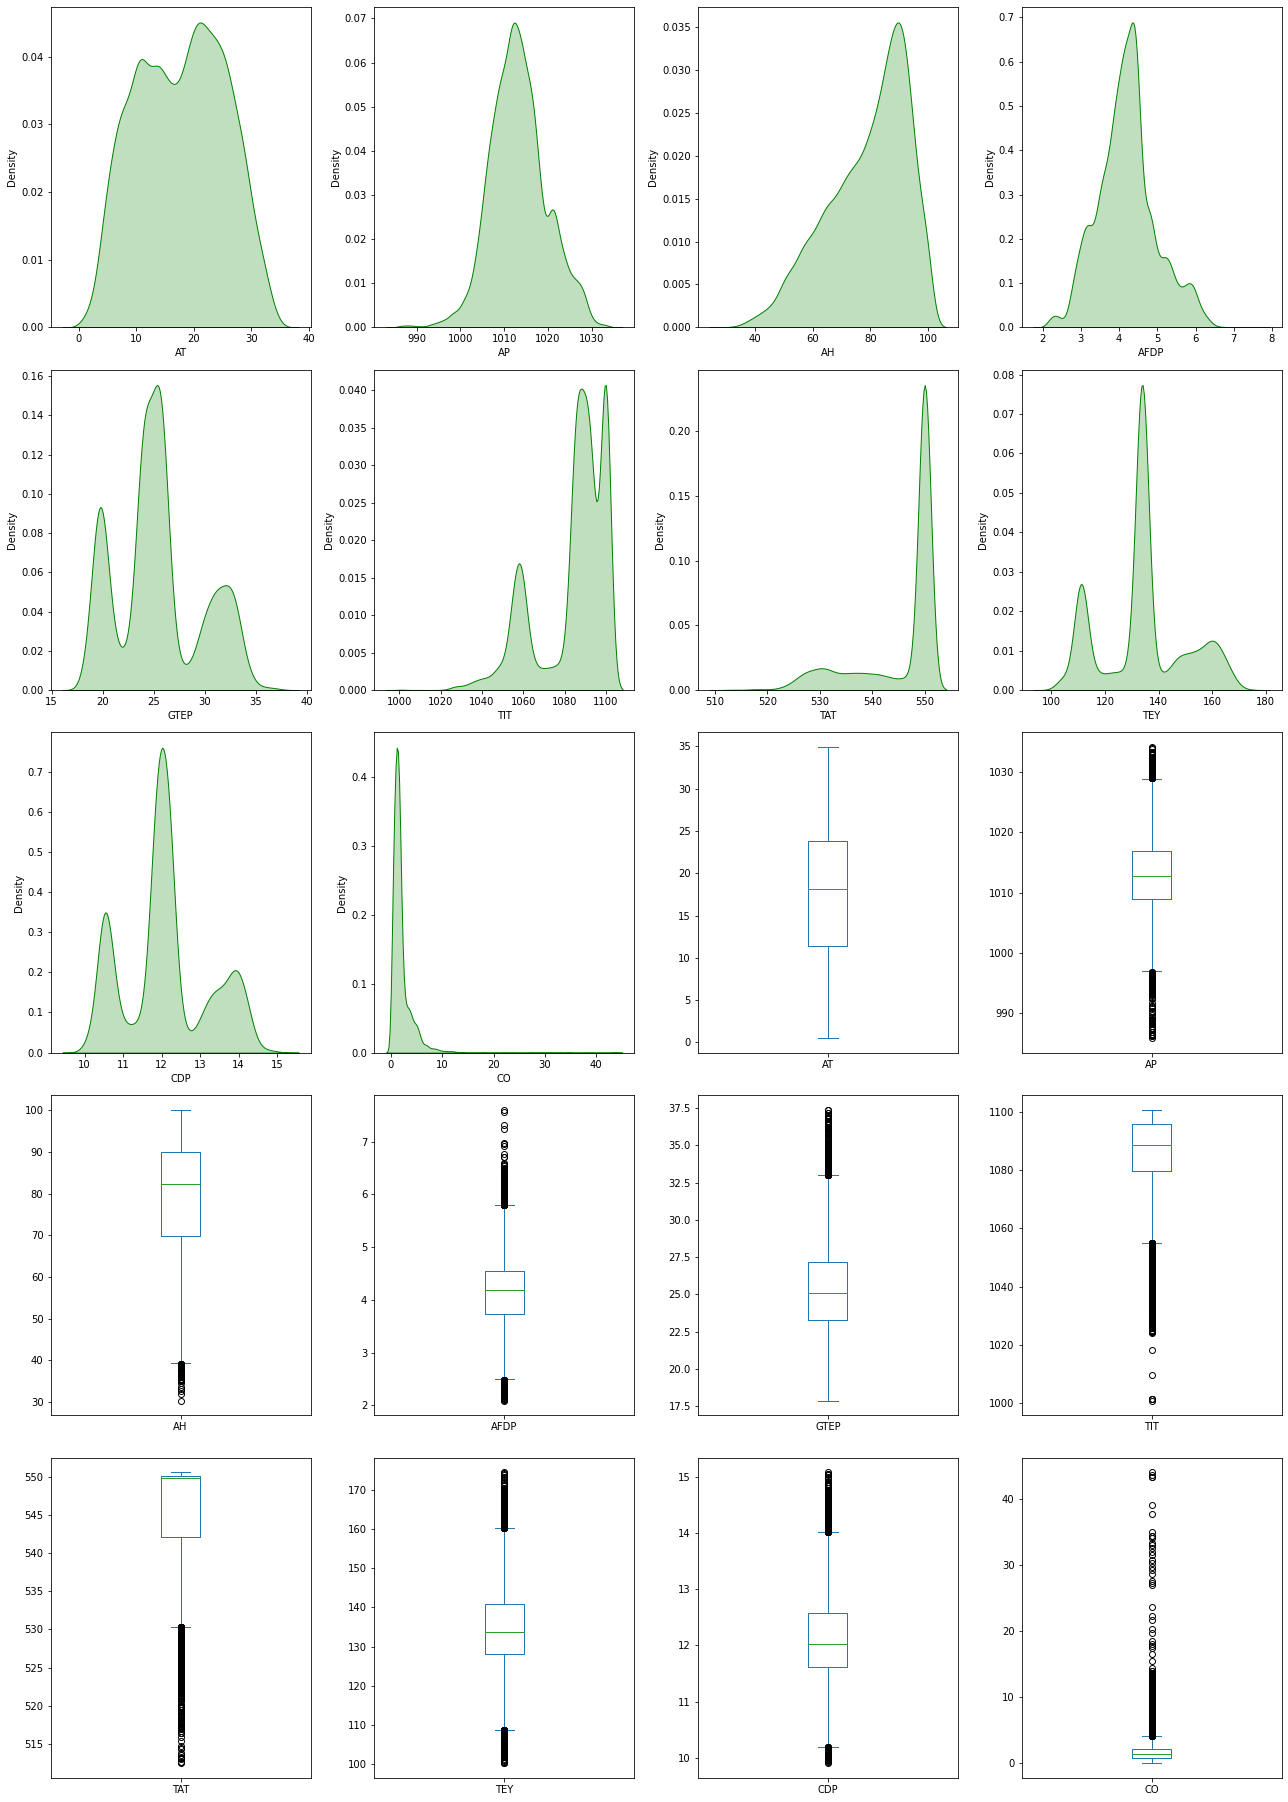

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116


In [13]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

# Finding Correlation

In [14]:
corr = df1[df1.columns[0:11]].corr()

<AxesSubplot:>

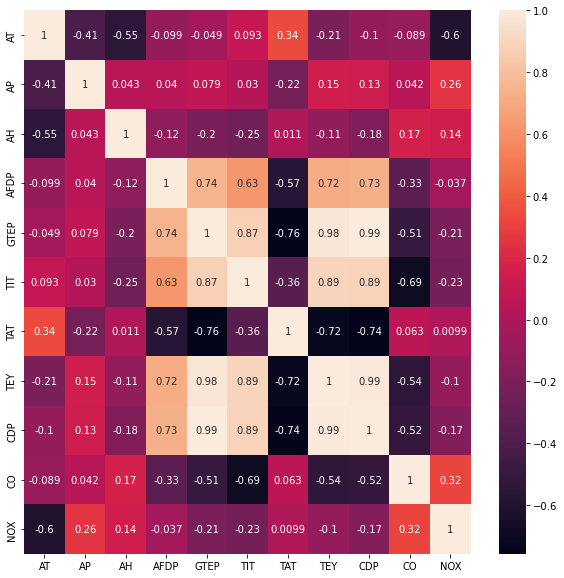

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [16]:
df1.iloc[:,0:7]

,AT,AP,AH,AFDP,GTEP,TIT,TAT
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98
...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24


In [17]:
df1.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [18]:
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return (x)

In [19]:
df1 = norm_func(df1)

In [20]:
X = df1.drop(columns=['TEY'])
y = df1.iloc[:,7]

# 3 - Neural Network Model

In [29]:
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [38]:
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
    
    
                                ])

In [39]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [40]:
num_epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/50
381/381 - 2s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 5.4347e-04 - val_mean_squared_error: 5.4347e-04 - 2s/epoch - 5ms/step
Epoch 2/50
381/381 - 1s - loss: 3.8349e-04 - mean_squared_error: 3.8349e-04 - val_loss: 2.5781e-04 - val_mean_squared_error: 2.5781e-04 - 1s/epoch - 3ms/step
Epoch 3/50
381/381 - 1s - loss: 2.5331e-04 - mean_squared_error: 2.5331e-04 - val_loss: 2.3127e-04 - val_mean_squared_error: 2.3127e-04 - 832ms/epoch - 2ms/step
Epoch 4/50
381/381 - 1s - loss: 1.9382e-04 - mean_squared_error: 1.9382e-04 - val_loss: 2.0910e-04 - val_mean_squared_error: 2.0910e-04 - 872ms/epoch - 2ms/step
Epoch 5/50
381/381 - 1s - loss: 1.5157e-04 - mean_squared_error: 1.5157e-04 - val_loss: 1.7230e-04 - val_mean_squared_error: 1.7230e-04 - 831ms/epoch - 2ms/step
Epoch 6/50
381/381 - 1s - loss: 1.3574e-04 - mean_squared_error: 1.3574e-04 - val_loss: 1.6761e-04 - val_mean_squared_error: 1.6761e-04 - 815ms/epoch - 2ms/step
Epoch 7/50
381/381 - 1s - loss: 1.3044e-04 - mea

In [33]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 3ms/step - loss: 9.9056e-05 - mean_squared_error: 9.9056e-05


# 4 - Conclusion

In [34]:
predictions = model.predict_on_batch(X_test_scaled)

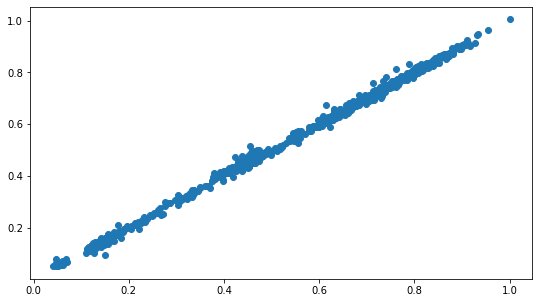

In [35]:
plt.scatter(y_test, predictions)

In [42]:
predictions_df2 = pd.DataFrame()
predictions_df2['Actual'] = y_test
predictions_df2['Predicted'] = predictions
predictions_df2['% Error'] = abs(predictions_df2['Actual'] - predictions_df2['Predicted'])/predictions_df['Actual']*100
predictions_df2.reset_index(drop = True)

,Actual,Predicted,% Error
0,0.460639,0.469188,1.855862
1,0.157308,0.160826,2.236337
2,0.450699,0.454115,0.758068
3,0.451639,0.453377,0.384778
4,0.142397,0.147094,3.298642
...,...,...,...
1499,0.439011,0.457418,4.192765
1500,0.334498,0.328115,1.908132
1501,0.816497,0.814356,0.262161
1502,0.442638,0.455023,2.797870
